# Homework Assignment  6

In [ ]:
# install relevant libraries
!pip install turicreate
!pip install kaggle 
!pip install spaCy
!pip install afinn

**Question 1:** Construct a sentiment classifier using 80% of the reviews in the [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews).
The classifier needs to predict if a product got a one-star or a five-star review. 
Evaluate the classifier using the rest of the data (30pt). 


In [1]:
# setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/

# Installing the Kaggle package
api_token = {"username":"*******","key":"**********"}

# creating kaggle.json file with the personal API-Key details 
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [2]:
# create directories
!mkdir ./datasets
!mkdir ./datasets/amazon

# download dataset from kaggle
!kaggle datasets download -d snap/amazon-fine-food-reviews -p ./datasets/amazon
!unzip ./datasets/amazon/*.zip -d ./datasets/amazon

 95% 230M/242M [00:02<00:00, 55.5MB/s]
100% 242M/242M [00:02<00:00, 102MB/s] 
Archive:  ./datasets/amazon/amazon-fine-food-reviews.zip
  inflating: ./datasets/amazon/Reviews.csv  
  inflating: ./datasets/amazon/database.sqlite  
  inflating: ./datasets/amazon/hashes.txt  


In [3]:
# load amazon reviews dataset
import turicreate as tc
sf = tc.SFrame.read_csv("./datasets/amazon/Reviews.csv")
sf

Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: ummm can s ... mmended!.,

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
88623

3 lines failed to parse correctly

Finished parsing file /content/datasets/amazon/Reviews.csv

Parsing completed. Parsed 100 lines in 1.34984 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,int,int,int,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: "ummm can  ...  hot sauce

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
88623

Unexpected characters after last column. "but that awful after taste has no place in my afternoons.  Fog Chaser is flavorful but smooth. If you have had difficulty finding a good coffee for the new machines"
Parse failed at token ending at: 
	e had difficulty finding a good coffee for the new machines,^ do give this one a try."
181216,B007Y59HVM,#oc-
Successfully parsed 10 tokens: 
	0: 181213
	1: B007Y59HVM
	2: #oc-R3W5DW4JKJT228
	3: Mamaw
	4: 0
	5: 2
	6: 1
	7: 1346112000
	8: Disappointed
	9: "I regret  ... he morning

Read 71440 lines. Lines per second: 44598.3

Unexpected characters after last column. "0"
Parse failed at token ending at: 
	 />\"
190510,B0012UEHFQ,A2788LGTSGCFA6,"Mom of 3 ""sue""",0,^0,5,1329436800,She Loves Them!,I have a crazy do
Successfully parsed 10 tokens: 
	0: 190509
	1: B0012UEHFQ
	2: A3CR0UBHFX0NE7
	3: Sharee Lee Peterson
	4: 0
	5: 0
	6: 1
	7: 1330300800
	8: Poor Substitute
	9: I had prev ... of 3 "sue"

Unexpected characters after last column. "B000GW46DE"
Parse failed at token ending at: 
	yself that tastes much better than this."
201283,B000GW46DE,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 201282
	1: B000GW46DE
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
201283

Unexpected characters after last column. "B000PMC7GI"
Parse failed at token ending at: 
	yself that tastes much better than this."
353089,B000PMC7GI,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 353088
	1: B000PMC7GI
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
353089

Unexpected characters after last column. "give it a try.  After drinking half of a bottle"
Parse failed at token ending at: 
	ou haven't, give it a try.  After drinking half of a bottle,^ you will know it's good stuff."
434576,B001SB1B
Successfully parsed 10 tokens: 
	0: 434574
	1: B002DHMX3A
	2: A2XNJJ9TF70P4J
	3: Angie
	4: 1
	5: 1
	6: 1
	7: 1307232000
	8: How did th ... s this up?
	9: "The cerea ... ou haven't

8 lines failed to parse correctly

Finished parsing file /content/datasets/amazon/Reviews.csv

Parsing completed. Parsed 260995 lines in 4.25049 secs.

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""NataliaCorres"" ...",1,1,4
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5


In [2]:
# get only 1 star and five stars reviews
sf_stars = sf[(sf['Score'] == 1) | (sf['Score'] == 5)]

# convert label to stars
def label2stars(label):
    if label == 5:
        return '5 stars'
    else:
        return '1 star'

sf_stars['stars'] = sf_stars['Score'].apply(lambda label: label2stars(label))
sf_stars

In [3]:
# add 1 gram and 2 grams columns
sf_stars['words_1grams'] = tc.text_analytics.count_ngrams(sf_stars['Text'], n=1, method='word')
sf_stars['words_2grams'] = tc.text_analytics.count_ngrams(sf_stars['Text'], n=2, method='word')
sf_stars

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5
11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5
12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5
13,B0009XLVG0,A327PCT23YH90,LT,1,1,1


In [4]:
# train classifier which get reviews and predicts if the review got 1 star or 5 stars
sf_stars.materialize()
train, test = sf_stars.random_split(0.8)
cls = tc.classifier.create(train, features=['words_1grams', 'words_2grams'], target="stars")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 144830

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 1276548

Number of coefficients      : 1276549

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.086914  | 6.141225     | 0.876904          | 0.873672            |

| 1         | 9        | 1.825189  | 10.501881    | 0.955500          | 0.906336            |

| 2         | 10       | 1.825189  | 12.085187    | 0.997093          | 0.952906            |

| 3         | 11       | 1.825189  | 13.686814    | 0.999171          | 0.960383            |

| 4         | 13       | 1.825189  | 16.187507    | 0.999655          | 0.964450            |

| 9         | 24       | 0.711207  | 29.664767    | 0.999965          | 0.966680            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 144830

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 1276548

Number of coefficients    : 1276549

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.086262  | 4.282494     | 0.876904          | 0.873672            |

| 1         | 9        | 1.811494  | 8.215836     | 0.928219          | 0.893874            |

| 2         | 10       | 1.811494  | 9.660231     | 0.410005          | 0.329267            |

| 3         | 13       | 0.358241  | 12.802117    | 0.997017          | 0.955529            |

| 4         | 14       | 0.447801  | 14.274956    | 0.998087          | 0.958022            |

| 9         | 19       | 1.000000  | 21.627089    | 0.999903          | 0.964712            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.966679784861603
PROGRESS: SVMClassifier                   : 0.9647120556211465
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [5]:
# evaluate classifier
cls.evaluate(test)

{'accuracy': 0.9663535350906867,
 'auc': 0.9752581299997795,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   5 stars    |      1 star     |  240  |
 |    1 star    |      1 star     |  3726 |
 |    1 star    |     5 stars     |  1053 |
 |   5 stars    |     5 stars     | 33410 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9810168396635004,
 'log_loss': 0.10583420143933722,
 'precision': 0.969445492267069,
 'recall': 0.9928677563150075,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0 

**Question 2:** Construct a sentiment classifier using features from the [TextBlob package](https://textblob.readthedocs.io/en/dev/index.html),
    and from the [affin package](https://pypi.org/project/afinn/). Compare the two classifiers results and visualize it (however you want) (20pt)

In [4]:
# remove neutral reviews 
sf_sent = sf[sf['Score'] != 3]

# transform labels to sentiments
def label2sentiment(label):
  if label >= 4:
    return 'Positive'
  else:
    return 'Negative'

sf_sent['sentiment'] = sf_sent['Score'].apply(lambda label: label2sentiment(label))
sf_sent

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""NataliaCorres"" ...",1,1,4
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5


In [5]:
# add affin measure column 
from afinn import Afinn
afinn = Afinn()

sf_sent['afinn_score'] = sf_sent['Text'].apply(lambda t: afinn.score(t))
sf_sent

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""NataliaCorres"" ...",1,1,4
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5


In [6]:
# add textblob measure column
from textblob import TextBlob

sf_sent['textblob_score'] = sf_sent['Text'].apply(lambda t: TextBlob(t).sentiment.polarity)
sf_sent

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""NataliaCorres"" ...",1,1,4
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5


In [7]:
# calculate all data
sf_sent.materialize()

In [8]:
# split to train and test - 80% train
train, test = sf_sent.random_split(0.8)

Afinn classifier

In [9]:
# create classifier with affin column
cls_afinn = tc.classifier.create(train, features=['afinn_score'], target='sentiment')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 183572

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.096419     | 0.862855          | 0.862865            | 0.545673          | 0.546198            |

| 2         | 0.179055     | 0.862855          | 0.862865            | 0.467131          | 0.468031            |

| 3         | 0.261680     | 0.862855          | 0.862865            | 0.421411          | 0.422577            |

| 4         | 0.335032     | 0.862855          | 0.862865            | 0.393951          | 0.395310            |

| 5         | 0.423637     | 0.862855          | 0.862865            | 0.377337          | 0.378854            |

| 10        | 0.805578     | 0.862855          | 0.862865            | 0.354985          | 0.356728            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 183572

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.088240     | 0.862855          | 0.862865            | 0.376606          | 0.378167            |

| 2         | 0.165446     | 0.862855          | 0.862865            | 0.376563          | 0.378151            |

| 3         | 0.240482     | 0.862855          | 0.862865            | 0.376536          | 0.378148            |

| 4         | 0.315197     | 0.862855          | 0.862865            | 0.376531          | 0.378149            |

| 5         | 0.393175     | 0.862855          | 0.862865            | 0.376525          | 0.378161            |

| 10        | 0.749565     | 0.862849          | 0.862865            | 0.376522          | 0.378168            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 183572

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.111208     | 0.862855          | 0.862865            | 0.376528          | 0.378143            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 183572

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 5.000000  | 0.116532     | 0.847695          | 0.845477            |

| 1         | 7        | 3.750000  | 0.225776     | 0.854068          | 0.851998            |

| 2         | 8        | 3.750000  | 0.280047     | 0.153547          | 0.154833            |

| 3         | 12       | 0.402975  | 0.385817     | 0.854068          | 0.851998            |

| 4         | 13       | 0.503719  | 0.434666     | 0.852320          | 0.850445            |

| 9         | 26       | 0.788239  | 0.832961     | 0.846126          | 0.844753            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 183572

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients      : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.208489     | 0.846600          | 0.845063            |

| 2         | 3        | 0.341524     | 0.852320          | 0.850445            |

| 3         | 4        | 0.458462     | 0.856242          | 0.854067            |

| 4         | 5        | 0.583785     | 0.856242          | 0.854067            |

| 5         | 6        | 0.704107     | 0.856242          | 0.854067            |

| 6         | 7        | 0.827923     | 0.856242          | 0.854067            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.862864831297868
PROGRESS: RandomForestClassifier          : 0.862864831297868
PROGRESS: DecisionTreeClassifier          : 0.862761333057338
PROGRESS: SVMClassifier                   : 0.8447526392051335
PROGRESS: LogisticClassifier              : 0.8540674808528255
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


Text blob classifier

In [10]:
# create classifier with the textblob column
cls_textblob = tc.classifier.create(train, features=['textblob_score'], target='sentiment')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 183572

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.092451     | 0.866526          | 0.868764            | 0.539496          | 0.538304            |

| 2         | 0.185246     | 0.866951          | 0.868764            | 0.456754          | 0.455123            |

| 3         | 0.268162     | 0.867088          | 0.868971            | 0.407688          | 0.405850            |

| 4         | 0.347669     | 0.867088          | 0.868971            | 0.377363          | 0.375504            |

| 5         | 0.430260     | 0.867022          | 0.869696            | 0.358304          | 0.356596            |

| 10        | 0.811315     | 0.867115          | 0.870006            | 0.329023          | 0.328474            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 183572

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.102737     | 0.866614          | 0.868971            | 0.360863          | 0.358954            |

| 2         | 0.179302     | 0.866788          | 0.869696            | 0.360782          | 0.358688            |

| 3         | 0.256057     | 0.866842          | 0.868868            | 0.360731          | 0.358643            |

| 4         | 0.343184     | 0.866968          | 0.869489            | 0.360669          | 0.358550            |

| 5         | 0.425250     | 0.866973          | 0.869592            | 0.360650          | 0.358508            |

| 10        | 0.795620     | 0.866989          | 0.869799            | 0.360758          | 0.358522            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 183572

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.097175     | 0.866526          | 0.868764            | 0.361073          | 0.359092            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 183572

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 5.000000  | 0.135310     | 0.851944          | 0.858621            |

| 1         | 5        | 5.000000  | 0.217648     | 0.865481          | 0.869075            |

| 2         | 7        | 4.480867  | 0.301828     | 0.749090          | 0.750776            |

| 3         | 11       | 1.494038  | 0.429277     | 0.859211          | 0.865038            |

| 4         | 12       | 1.494038  | 0.486887     | 0.846186          | 0.853757            |

| 9         | 23       | 0.532476  | 0.874454     | 0.846300          | 0.853757            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 183572

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients      : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.237049     | 0.853763          | 0.860381            |

| 2         | 3        | 0.362227     | 0.861918          | 0.865763            |

| 3         | 4        | 0.496721     | 0.864282          | 0.868454            |

| 4         | 5        | 0.633586     | 0.864609          | 0.869075            |

| 5         | 6        | 0.770194     | 0.864614          | 0.869178            |

| 6         | 7        | 0.906066     | 0.864614          | 0.869178            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.8700062098944318
PROGRESS: RandomForestClassifier          : 0.869799213413372
PROGRESS: DecisionTreeClassifier          : 0.8687642310080729
PROGRESS: SVMClassifier                   : 0.8537569861312357
PROGRESS: LogisticClassifier              : 0.8691782239701925
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


Comparison

In [11]:
results_afinn = cls_afinn.evaluate(test)
results_afinn

{'accuracy': 0.8643540322413328,
 'auc': 0.7648083737530633,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   Positive   |     Negative    |  1005 |
 |   Negative   |     Negative    |  1804 |
 |   Negative   |     Positive    |  5533 |
 |   Positive   |     Positive    | 39857 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9241988591568892,
 'log_loss': 0.35534263334464283,
 'precision': 0.8781009032826613,
 'recall': 0.9754050217806275,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+-------+------+
 | threshold | fpr | tpr |   p   |  n   |
 +-----------+-----+-----+-------+------+
 |    0.0    | 1.0 | 1.0 | 40862 | 7337 |
 |   0.001   | 1.0 | 1.0 | 40862 | 7337 |
 |   0.002   | 

In [12]:
results_textblob = cls_textblob.evaluate(test)
results_textblob

{'accuracy': 0.8675076246395154,
 'auc': 0.8228482075388771,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   Positive   |     Negative    |  1059 |
 |   Negative   |     Positive    |  5327 |
 |   Negative   |     Negative    |  2010 |
 |   Positive   |     Positive    | 39803 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.925737277886315,
 'log_loss': 0.3304808411686122,
 'precision': 0.8819632173720363,
 'recall': 0.9740835005628702,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+-------+------+
 | threshold | fpr | tpr |   p   |  n   |
 +-----------+-----+-----+-------+------+
 |    0.0    | 1.0 | 1.0 | 40862 | 7337 |
 |   0.001   | 1.0 | 1.0 | 40862 | 7337 |
 |   0.002   | 1.

Visualization

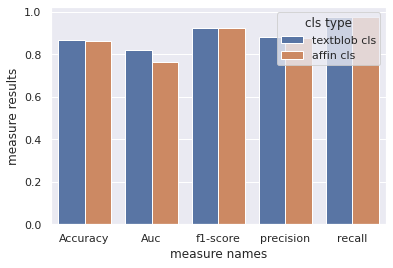

In [13]:
import seaborn as sns
import pandas as pd
sns.set()

# measures to visualize
measures            = ['Accuracy', 'Auc', 'f1-score', 'precision', 'recall']
text_blob_measures  = [results_textblob['accuracy'], results_textblob['auc'], results_textblob['f1_score'], results_textblob['precision'], results_textblob['recall']]
afinn_measures      = [results_afinn['accuracy'], results_afinn['auc'], results_afinn['f1_score'], results_afinn['precision'], results_afinn['recall']]

# create df with the above measures and visualize the results
df = pd.DataFrame({'measure names':measures + measures, 'measure results':text_blob_measures + afinn_measures, 'cls type': ['textblob cls'] * len(measures) + ['affin cls'] * len(measures)})
sns.barplot(x="measure names", y="measure results", hue="cls type", data=df)

**Question 3:**  Select a different reviews dataset and create a sentiment classifier which utilizes word embeddings (25pt).
Evaluate this classifier (5pt). Try to improve your classifier by adding additional features (20pt)

I selected the 100k-courseras-course-reviews datasets

In [ ]:
# create directory for the dataset
!mkdir ./datasets
!mkdir ./datasets/100k-courseras-course-reviews-dataset

# download the dataset from Kaggle and unzip it
!kaggle datasets download septa97/100k-courseras-course-reviews-dataset -f reviews.csv  -p ./datasets/100k-courseras-course-reviews-dataset
!unzip ./datasets/100k-courseras-course-reviews-dataset/*.zip  -d ./datasets/100k-courseras-course-reviews-dataset/

In [4]:
import turicreate as tc
# load the datasets into an sframe
sf_coursera = tc.SFrame.read_csv("./datasets/100k-courseras-course-reviews-dataset/reviews.csv")
sf_coursera

Finished parsing file /content/datasets/100k-courseras-course-reviews-dataset/reviews.csv

Parsing completed. Parsed 100 lines in 0.451725 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/100k-courseras-course-reviews-dataset/reviews.csv

Parsing completed. Parsed 107018 lines in 0.33229 secs.

Id,Review,Label
0,good and interesting,5
1,This class is veryhelpful to me. Curren ...,5
2,like!Prof and TAs arehelpful and the ...,5
3,Easy to follow andincludes a lot basic and ...,5
4,Really nice teacher!Icould got the point ...,4
5,"Great course - Irecommend it for all, ...",5
6,One of the most usefulcourse on IT Management! ...,5
7,I was disappointedbecause the name is ...,3
8,Super content. I'lldefinitely re-do the ...,5
9,One of the excellentcourses at Coursera for ...,5


In [5]:
def label2sentiment(label):
    if label >= 4:
        return "Positive"
    else:
        return "Negative"

# remove neutral reviews and transform labels to sentiments
sf_coursera = sf_coursera[sf_coursera['Label'] != 3]
sf_coursera['sentiment'] = sf_coursera['Label'].apply(lambda label: label2sentiment(label))
sf_coursera

Id,Review,Label,sentiment
0,good and interesting,5,Positive
1,This class is veryhelpful to me. Curren ...,5,Positive
2,like!Prof and TAs arehelpful and the ...,5,Positive
3,Easy to follow andincludes a lot basic and ...,5,Positive
4,Really nice teacher!Icould got the point ...,4,Positive
5,"Great course - Irecommend it for all, ...",5,Positive
6,One of the most usefulcourse on IT Management! ...,5,Positive
8,Super content. I'lldefinitely re-do the ...,5,Positive
9,One of the excellentcourses at Coursera for ...,5,Positive
10,Is there any reason whyyou should not apply the ...,5,Positive


In [2]:
# import spacy for embedding
import spacy
!python -m spacy download en_core_web_lg
nlp = spacy.load('en_core_web_lg')

In [7]:
# use gpu to get the embedding of each review based on the spacy library pre trained transformers
from tqdm import tqdm
spacy.require_gpu()

l = []
for i in tqdm(range(len(sf_coursera))):
    text = sf_coursera[i]["Review"]
    l.append(nlp(text).vector)

# add embedding into the sframe
sf_coursera['vector'] = l 
sf_coursera

100%|██████████| 101947/101947 [21:54<00:00, 77.57it/s]


Id,Review,Label,sentiment,vector
0,good and interesting,5,Positive,[-2.32115671e-012.32182667e-01 ...
1,This class is veryhelpful to me. Curren ...,5,Positive,[-5.86119713e-042.56630570e-01 ...
2,like!Prof and TAs arehelpful and the ...,5,Positive,[-9.35494304e-028.32590014e-02 ...
3,Easy to follow andincludes a lot basic and ...,5,Positive,[-6.36644140e-028.63443241e-02 ...
4,Really nice teacher!Icould got the point ...,4,Positive,[-1.85936373e-021.59248367e-01 ...
5,"Great course - Irecommend it for all, ...",5,Positive,[-1.13400117e-012.60630727e-01 ...
6,One of the most usefulcourse on IT Management! ...,5,Positive,[-1.04022004e-011.77965701e-01 ...
8,Super content. I'lldefinitely re-do the ...,5,Positive,[-4.58760001e-021.45201743e-01 ...
9,One of the excellentcourses at Coursera for ...,5,Positive,[-8.29980001e-021.16817139e-01 ...
10,Is there any reason whyyou should not apply the ...,5,Positive,[-9.43170190e-021.65416613e-01 ...


In [12]:
# append 1 grams and 2 grams columns into the sframe
sf_coursera['words_1grams'] = tc.text_analytics.count_ngrams(sf_coursera['Review'], n=1, method='word')
sf_coursera['words_2grams'] = tc.text_analytics.count_ngrams(sf_coursera['Review'], n=2, method='word')
sf_coursera

Id,Review,Label,sentiment,vector,words_1grams
0,good and interesting,5,Positive,[-2.32115671e-012.32182667e-01 ...,"{'interesting': 1, 'and':1, 'good': 1} ..."
1,This class is veryhelpful to me. Curren ...,5,Positive,[-5.86119713e-042.56630570e-01 ...,"{'knowledge': 1, 'basic':1, 'lot': 1, 'a': 1, ..."
2,like!Prof and TAs arehelpful and the ...,5,Positive,[-9.35494304e-028.32590014e-02 ...,"{'experience': 1,'rewarding': 1, 'very': ..."
3,Easy to follow andincludes a lot basic and ...,5,Positive,[-6.36644140e-028.63443241e-02 ...,"{'sketchup': 1, 'use': 1,'easy': 1, 'and': 2, ..."
4,Really nice teacher!Icould got the point ...,4,Positive,[-1.85936373e-021.59248367e-01 ...,"{'really': 1, 'teacher':1, 'i': 1, 'nice': 1, ..."
5,"Great course - Irecommend it for all, ...",5,Positive,[-1.13400117e-012.60630727e-01 ...,"{'course': 1,'recommend': 1, 'i': 1, ..."
6,One of the most usefulcourse on IT Management! ...,5,Positive,[-1.04022004e-011.77965701e-01 ...,"{'management': 1, 'it':1, 'on': 1, 'course': 1, ..."
8,Super content. I'lldefinitely re-do the ...,5,Positive,[-4.58760001e-021.45201743e-01 ...,"{'course': 1, 're': 1,'the': 1, 'do': 1, ..."
9,One of the excellentcourses at Coursera for ...,5,Positive,[-8.29980001e-021.16817139e-01 ...,"{'managers': 1, 'and': 1,'bosses': 1, 'one': 1, ..."
10,Is there any reason whyyou should not apply the ...,5,Positive,[-9.43170190e-021.65416613e-01 ...,"{'oleg': 1, 'regards': 1,'best': 1, 'aspects': 1, ..."


In [18]:
# train a random forest model to classify sentiment based only on the embeddings
train, test  = sf_coursera.random_split(0.8)
cls_embedding = tc.random_forest_classifier.create(train, features=['vector'], target="sentiment", max_iterations=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 77531

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.612012     | 0.956276          | 0.947317            | 0.208038          | 0.225133            |

| 2         | 3.106129     | 0.956533          | 0.947562            | 0.206720          | 0.225377            |

| 3         | 4.612240     | 0.957449          | 0.948542            | 0.205396          | 0.224204            |

| 4         | 6.152908     | 0.957256          | 0.949277            | 0.204846          | 0.223875            |

| 5         | 7.643138     | 0.957411          | 0.948787            | 0.204709          | 0.223733            |

| 10        | 15.176685    | 0.956301          | 0.948787            | 0.204100          | 0.222359            |

| 15        | 22.644998    | 0.956159          | 0.948052            | 0.203897          | 0.222266            |

| 20        | 30.060798    | 0.956611          | 0.948542            | 0.203957          | 0.222606            |

| 25        | 37.641436    | 0.956288          | 0.948542            | 0.203881          | 0.222136            |

| 30        | 45.181964    | 0.956095          | 0.948787            | 0.203896          | 0.222056            |

| 35        | 52.562885    | 0.956095          | 0.948297            | 0.203896          | 0.222228            |

| 40        | 60.084531    | 0.955992          | 0.948787            | 0.203899          | 0.222126            |

| 45        | 67.614028    | 0.955940          | 0.948297            | 0.203923          | 0.222045            |

| 50        | 75.086172    | 0.956147          | 0.948787            | 0.203902          | 0.222042            |

| 55        | 82.611722    | 0.956069          | 0.948787            | 0.203926          | 0.221970            |

| 60        | 90.082798    | 0.956082          | 0.948787            | 0.203922          | 0.221968            |

| 65        | 97.574558    | 0.955889          | 0.948297            | 0.203860          | 0.221859            |

| 70        | 105.021621   | 0.955953          | 0.947807            | 0.203874          | 0.221928            |

| 75        | 112.497720   | 0.955966          | 0.948052            | 0.203866          | 0.221919            |

| 80        | 119.947035   | 0.956018          | 0.948052            | 0.203877          | 0.221969            |

| 85        | 127.422187   | 0.956082          | 0.948297            | 0.203874          | 0.221980            |

| 90        | 134.960395   | 0.956082          | 0.948542            | 0.203837          | 0.221959            |

| 95        | 142.568279   | 0.956082          | 0.948787            | 0.203842          | 0.221966            |

| 100       | 150.059186   | 0.956134          | 0.948787            | 0.203828          | 0.221941            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [19]:
# evaluate classifier
cls_embedding.evaluate(test)

{'accuracy': 0.9559872141627735,
 'auc': 0.9234065318344892,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   Negative   |     Negative    |   44  |
 |   Positive   |     Negative    |   8   |
 |   Negative   |     Positive    |  887  |
 |   Positive   |     Positive    | 19396 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9774485347846902,
 'log_loss': 0.20872573622204715,
 'precision': 0.956268796529113,
 'recall': 0.9995877138734282,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+-------+-----+
 | threshold | fpr | tpr |   p   |  n  |
 +-----------+-----+-----+-------+-----+
 |    0.0    | 1.0 | 1.0 | 19404 | 931 |
 |   0.001   | 1.0 | 1.0 | 19404 | 931 |
 |   0.002   | 1.0 | 

Improvement

In [25]:
# append textblob score into the sframe
from textblob import TextBlob

train['textblob_score'] = train['Review'].apply(lambda t: TextBlob(t).sentiment.polarity)
test['textblob_score'] = test['Review'].apply(lambda t: TextBlob(t).sentiment.polarity)
train

Id,Review,Label,sentiment,vector,words_1grams
0,good and interesting,5,Positive,[-2.32115671e-012.32182667e-01 ...,"{'interesting': 1, 'and':1, 'good': 1} ..."
2,like!Prof and TAs arehelpful and the ...,5,Positive,[-9.35494304e-028.32590014e-02 ...,"{'experience': 1,'rewarding': 1, 'very': ..."
3,Easy to follow andincludes a lot basic and ...,5,Positive,[-6.36644140e-028.63443241e-02 ...,"{'sketchup': 1, 'use': 1,'easy': 1, 'and': 2, ..."
4,Really nice teacher!Icould got the point ...,4,Positive,[-1.85936373e-021.59248367e-01 ...,"{'really': 1, 'teacher':1, 'i': 1, 'nice': 1, ..."
6,One of the most usefulcourse on IT Management! ...,5,Positive,[-1.04022004e-011.77965701e-01 ...,"{'management': 1, 'it':1, 'on': 1, 'course': 1, ..."
8,Super content. I'lldefinitely re-do the ...,5,Positive,[-4.58760001e-021.45201743e-01 ...,"{'course': 1, 're': 1,'the': 1, 'do': 1, ..."
9,One of the excellentcourses at Coursera for ...,5,Positive,[-8.29980001e-021.16817139e-01 ...,"{'managers': 1, 'and': 1,'bosses': 1, 'one': 1, ..."
10,Is there any reason whyyou should not apply the ...,5,Positive,[-9.43170190e-021.65416613e-01 ...,"{'oleg': 1, 'regards': 1,'best': 1, 'aspects': 1, ..."
11,Excellent course andteachers. ...,5,Positive,[-2.26002887e-011.54606625e-01 ...,"{'teachers': 1, 'and': 1,'course': 1, ..."
12,This is a good course foran CIO in a non techn ...,5,Positive,[-1.30472273e-011.55484214e-01 ...,"{'company': 1,'technical': 1, 'is': 1, ..."


In [26]:
# improve classifier with 1 grams and textblob score
cls_embedding_imp = tc.random_forest_classifier.create(train, features=['vector', 'words_1grams', 'textblob_score'], target="sentiment", max_iterations=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 77531

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 28462

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.583797     | 0.964827          | 0.957608            | 0.193403          | 0.202141            |

| 2         | 3.111571     | 0.964595          | 0.957118            | 0.193656          | 0.203631            |

| 3         | 4.685874     | 0.966697          | 0.960059            | 0.191583          | 0.200182            |

| 4         | 6.131568     | 0.967200          | 0.961774            | 0.190606          | 0.199069            |

| 5         | 7.687918     | 0.966581          | 0.960304            | 0.191454          | 0.200206            |

| 10        | 15.340084    | 0.967536          | 0.963734            | 0.190229          | 0.198229            |

| 15        | 22.862412    | 0.968361          | 0.966430            | 0.189575          | 0.197512            |

| 20        | 30.653346    | 0.967458          | 0.963979            | 0.190072          | 0.198143            |

| 25        | 38.314212    | 0.967561          | 0.962999            | 0.189800          | 0.197925            |

| 30        | 46.178755    | 0.967781          | 0.964715            | 0.189514          | 0.197519            |

| 35        | 54.058077    | 0.967652          | 0.964715            | 0.189376          | 0.197242            |

| 40        | 61.715549    | 0.967716          | 0.964960            | 0.189368          | 0.197319            |

| 45        | 69.436316    | 0.967458          | 0.964469            | 0.189377          | 0.197300            |

| 50        | 77.085616    | 0.967806          | 0.964715            | 0.189254          | 0.196990            |

| 55        | 84.731381    | 0.967536          | 0.964224            | 0.189399          | 0.197125            |

| 60        | 92.502673    | 0.967497          | 0.963979            | 0.189325          | 0.196974            |

| 65        | 100.400294   | 0.967639          | 0.963734            | 0.189275          | 0.196889            |

| 70        | 108.011119   | 0.967600          | 0.964224            | 0.189411          | 0.197156            |

| 75        | 115.735141   | 0.967536          | 0.963734            | 0.189534          | 0.197399            |

| 80        | 123.380325   | 0.967523          | 0.962999            | 0.189588          | 0.197468            |

| 85        | 131.043449   | 0.967523          | 0.962999            | 0.189590          | 0.197525            |

| 90        | 138.816423   | 0.967587          | 0.963244            | 0.189524          | 0.197445            |

| 95        | 146.697622   | 0.967587          | 0.963734            | 0.189469          | 0.197291            |

| 100       | 154.516761   | 0.967626          | 0.963979            | 0.189414          | 0.197195            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [27]:
# evaluate classifier
cls_embedding_imp.evaluate(test)

{'accuracy': 0.9638062453897221,
 'auc': 0.94466129875444,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   Positive   |     Negative    |   71  |
 |   Negative   |     Positive    |  665  |
 |   Negative   |     Negative    |  266  |
 |   Positive   |     Positive    | 19333 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9813207451398407,
 'log_loss': 0.19520626727881624,
 'precision': 0.9667466746674668,
 'recall': 0.9963409606266749,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+-------+-----+
 | threshold | fpr | tpr |   p   |  n  |
 +-----------+-----+-----+-------+-----+
 |    0.0    | 1.0 | 1.0 | 19404 | 931 |
 |   0.001   | 1.0 | 1.0 | 19404 | 931 |
 |   0.002   | 1.0 | 1

We can see the model improved from 0.92 to 0.94 auc and from 0.95 to 0.96 accuracy.